In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [9]:
datos = pd.read_csv("C:\\Users\\lopez\\OneDrive\\Documentos\\BD\\cliente_tienda.csv")

In [10]:
print("Dimensiones del dataset:", datos.shape)
display(datos.head())

Dimensiones del dataset: (200, 5)


,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
print("\nInformación del dataset:")
print(datos.info())
print("\nEstadísticas descriptivas:")
display(datos.describe().T)


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CustomerID                     200 non-null    int64 
 1   Genero                         200 non-null    object
 2   Edad                           200 non-null    int64 
 3   Ingresos Anuales ($)           200 non-null    int64 
 4   Porcentajde de gastos (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Ingresos Anuales ($),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Porcentajde de gastos (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [18]:
datos = datos.dropna()
print("\nDimensiones después de limpiar valores nulos:", datos.shape)


Dimensiones después de limpiar valores nulos: (200, 5)


In [19]:
X = datos.select_dtypes(include=np.number)
print("\nColumnas numéricas seleccionadas para K-Means:")
print(X.columns)


Columnas numéricas seleccionadas para K-Means:
Index(['CustomerID', 'Edad', 'Ingresos Anuales ($)',
       'Porcentajde de gastos (1-100)'],
      dtype='object')


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
Nc = range(2, 11)
inertias = []
silhouettes = []

for k in Nc:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

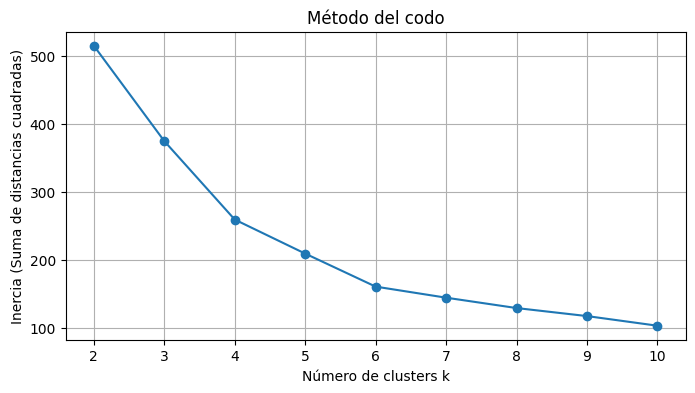

In [22]:
plt.figure(figsize=(8,4))
plt.plot(list(Nc), inertias, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters k")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.grid(True)
plt.show()

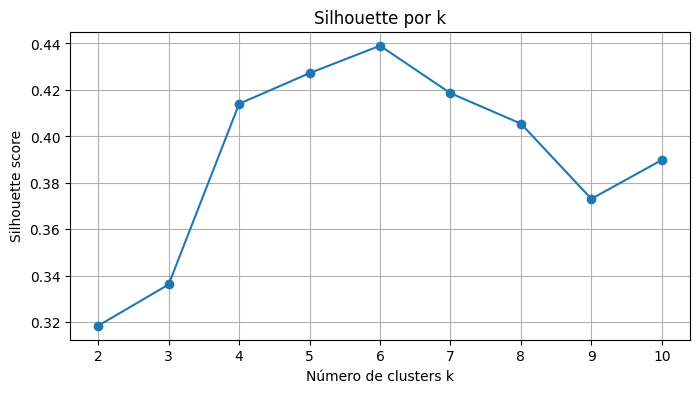

In [23]:
plt.figure(figsize=(8,4))
plt.plot(list(Nc), silhouettes, marker='o')
plt.title("Silhouette por k")
plt.xlabel("Número de clusters k")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

In [24]:
best_k = Nc[np.argmax(silhouettes)]
print("\nNúmero óptimo de clusters (mejor silhouette):", best_k)


Número óptimo de clusters (mejor silhouette): 6


In [25]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

In [26]:
datos['Cluster'] = clusters

In [27]:
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=X.columns)
centroids_df['Cluster'] = range(best_k)
print("\nCentroides de cada cluster:")
display(centroids_df)


Centroides de cada cluster:


,CustomerID,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100),Cluster
0,82.022727,56.340909,53.704545,49.386364,0
1,162.000000,32.692308,86.538462,82.128205,1
2,23.041667,25.250000,25.833333,76.916667,2
3,164.428571,41.685714,88.228571,17.285714,3
4,23.190476,45.523810,26.285714,19.380952,4
5,91.297297,26.891892,57.135135,48.810811,5


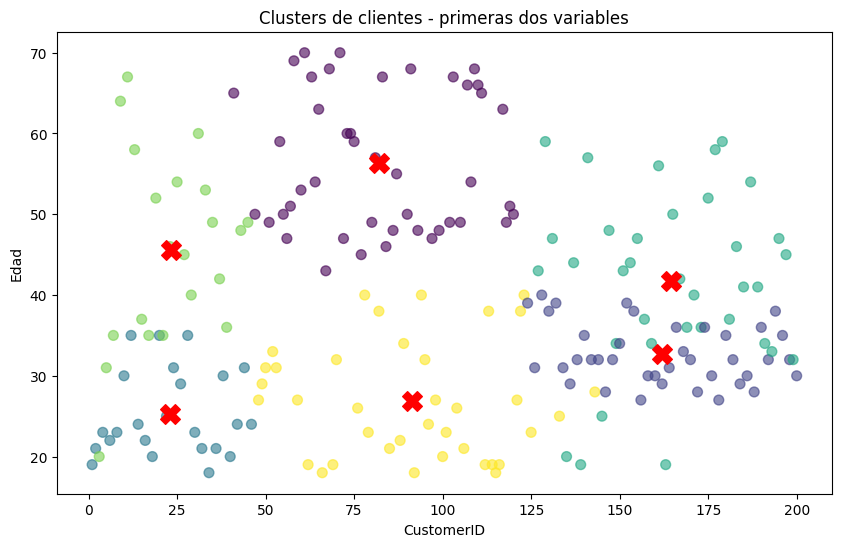

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids_df.iloc[:,0], centroids_df.iloc[:,1], c='red', marker='X', s=200)
plt.title("Clusters de clientes - primeras dos variables")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

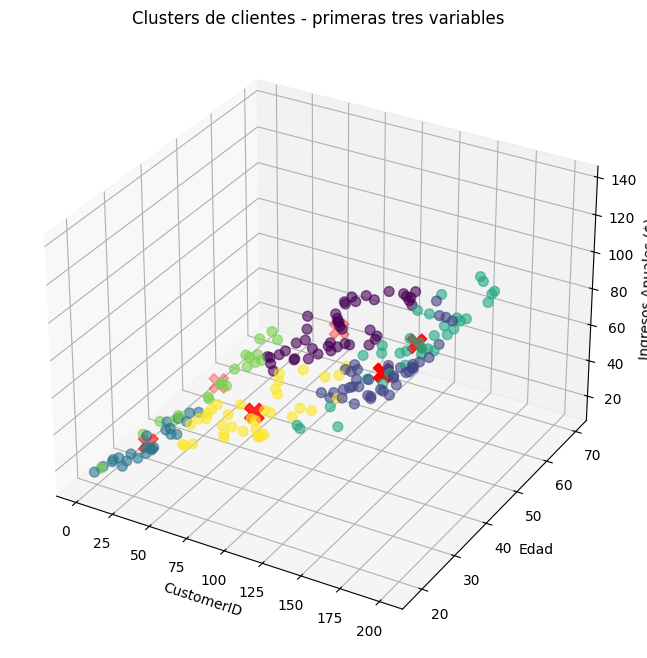

In [29]:
if X.shape[1] >= 3:
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=clusters, cmap='viridis', s=50, alpha=0.6)
    ax.scatter(centroids_df.iloc[:,0], centroids_df.iloc[:,1], centroids_df.iloc[:,2], c='red', marker='X', s=200)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_zlabel(X.columns[2])
    plt.title("Clusters de clientes - primeras tres variables")
    plt.show()

In [30]:
sil_score = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette score global del modelo: {sil_score:.4f}")


Silhouette score global del modelo: 0.4390


In [31]:
datos.to_csv("cliente_tienda_clusters.csv", index=False)
centroids_df.to_csv("cliente_tienda_centroids.csv", index=False)
print("Archivos guardados: cliente_tienda_clusters.csv y cliente_tienda_centroids.csv")

Archivos guardados: cliente_tienda_clusters.csv y cliente_tienda_centroids.csv
